# Учебный проект 9_Машинное обучение в бизнесе

## Содержание

* [Описание проекта](#Описание)
* [Импорт библиотек Python](#Импорт)
* [Загрузка данных](#Загрузка)
* [Подготовка данных для машиннного обучения](#Подготовка)
* [Построение моделей машинного обучения](#Моделирование)
* [Оценка достаточности объема сырья для безубыточной разработки](#Безубыток)
* [Общий вывод](#Вывод)


## Описание проекта <a class = 'anchor' id = 'Описание'></a>

На исследовании находятся данные с `пробами нефти в трех регионах`, которые были предоставлены руководством компании "ГлавРосГосНефть".

---

`Задача`

1. **Разработать модель машинного обучения для прогнозирования объема запасов в новых скважинах**;
2. **Выбрать регион с максимальной суммарной прибылью на основании прогноза запасов в новых скважинах и при существующих экономических ограничениях**;

---

`Путь решения`

1. Собрать данные геологоразведки по трем регионам;
2. Провести предобработку значений в наборах данных; Провести исследовательский анализ данных для выявления закономерностей, применимых к последующей настройке моделей МО;
3. Построить модели **линейной регрессии** для каждого из наборов данных, которые `спрогнозируют объемы запасов нефти в новых точках`;
4. Оценить качество моделей на метрике **RMSE**;
5. Оценить достаточный объем сырья для **безубыточной разработки** новой скважины;
6. Расчитать риски и прибыль для каждого региона на основании техники **Bootstrap** с 1  000 выборок.

---

`Располагаемые данные`

**Данные геологоразведки трех регионов находятся в файлах, имеющих схожую структуру**

Сами данные хранятся в наборах `geo_data_0`, `geo_data_1`, `geo_data_2`

* id - уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (доподлинно не известно сути данных показателей);
* product — объем запасов в скважине (тыс. баррелей).

## Импорт библиотек Python <a class = 'anchor' id = 'Импорт'></a>

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
    * для решения задач машинного обучения:
        * модели классификации;
        * метрики оценки эффективности моделей;
        * механизмы отбора данных и подбора параметров моделей;
        * механизмы подготовки данных;
        * механизмы построения пайплайнов;
        * механизм заполнения пустых значений;
        * механизм анализха влияния признаков.
2. Инициализация переменных-констант для последующего использования на этапе построения моделей МО;
3. Формирование вывода по итогам данного этапа.

In [ ]:
# импорт библиотек python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
# установка размеров для последующих графиков в проекте
plt.rcParams['figure.figsize'] = (10, 5)


# модели классификации
from sklearn.linear_model import LinearRegression

# метрики оценки эффективности моделей
from sklearn.metrics import mean_squared_error

# механизмы отбора данных и подбора параметров моделей
from sklearn.model_selection import train_test_split

# механизмы подготовки данных
from sklearn.preprocessing import StandardScaler

In [2]:
# инициализация констант для дальнейшего использования в проекте
# инициализация переменной RANDOM_STATE для фиксирования "случайности"
RANDOM_STATE = 42
TEST_SIZE = 0.25

**Вывод**

1. Импортированы библиотеки Python:
    * для манипулирования данными:
        * pandas;
        * numpy.
    * для визуализации данных:
        * matplotlib.pyplot;
        * seaborn.
    * для решения задач машинного обучения:
        * LinearRegression - модель линейной регрессии;
        * mean_squared_error - среднеквадратичная ошибка;
        * train_test_split - механизм разделения данных;
        * StandardScaler - стандартизация данных;
2. Инициализированы переменные:
    * **RANDOM_STATE** для фиксирования "случайности";
    * **TEST_SIZE** для фиксирования размера тестовой выборки.

## Загрузка данных <a class = 'anchor' id = 'Загрузка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменных в соответствие с названиями загружаемых датасетов:
    * **region_1**;
    * **region_2**;
    * **region_3**.
2. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
    * визуализация распределений количественных показателей.
3. Формирование вывода по итогам данного этапа.

In [3]:
# загрузка данных в рабочую среду

try:
    region_1 = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/geo_data_0.csv') # тренировочная выборка
    region_2 = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/geo_data_1.csv') # входные признаки тестовой выборки
    region_3 = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/geo_data_2.csv') # целевой признак тестовой выборки
except:
    region_1 = pd.read_csv('/datasets/geo_data_0.csv')
    region_2 = pd.read_csv('/datasets/geo_data_1.csv')
    region_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
# инициализация пользовательской функции для первичного изучения содержимого наборов данных
def  first_meeting (df : pd.DataFrame, df_name : str) -> None:
    print(f'Структура набора данных {df_name}')
    display(df.head())
    print('Общая информация о наборе')
    print(df.info())
    print()

In [5]:
# инициализация пользовательской функции построения распределений количественных непрерывных показателей
def num_distribution(df : pd.DataFrame, column : str, bins : int):
    plt.subplot(1, 2, 1)
    plt.xlabel(f'Значения признака {column}')
    plt.ylabel(f'Частота значений признака')
    plt.title(f'Гистограмма значений {column}', fontsize = 10)
    sns.histplot(df, x = column, bins = bins)
    plt.subplot(1, 2, 2)
    plt.xlabel(f'Значения признака {column}')
    plt.title(f'Диаграмма размаха значений {column}', fontsize = 10)
    sns.boxplot(df, x = column)
    plt.grid(False)
    plt.show()

In [6]:
# инициализация пользовательской функции построения диаграмм количественных дискретных показателей
def num_countplot(df : pd.DataFrame, column : str):
    sns.countplot(df, x = column)
    plt.title(f'Столбчатая диаграмма значений признака {column}', fontsize = 12)
    plt.xlabel(f'Признак {column}')
    plt.ylabel(f'Количество значений признака')
    plt.show()

Структура набора данных region_1


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None



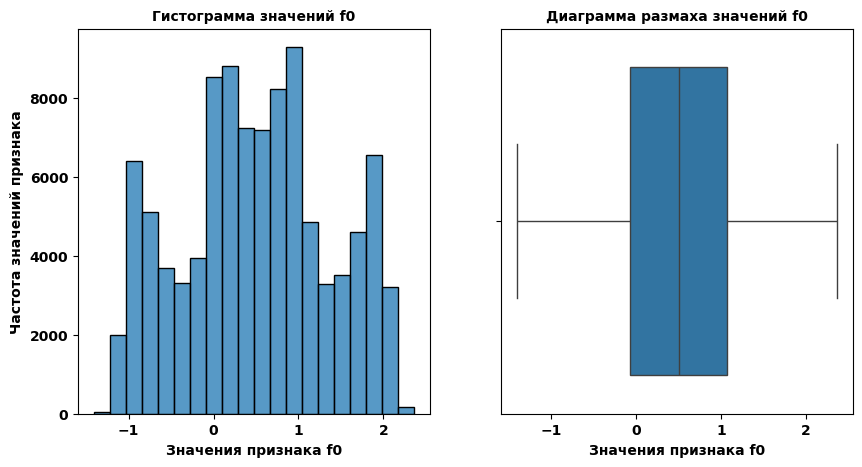

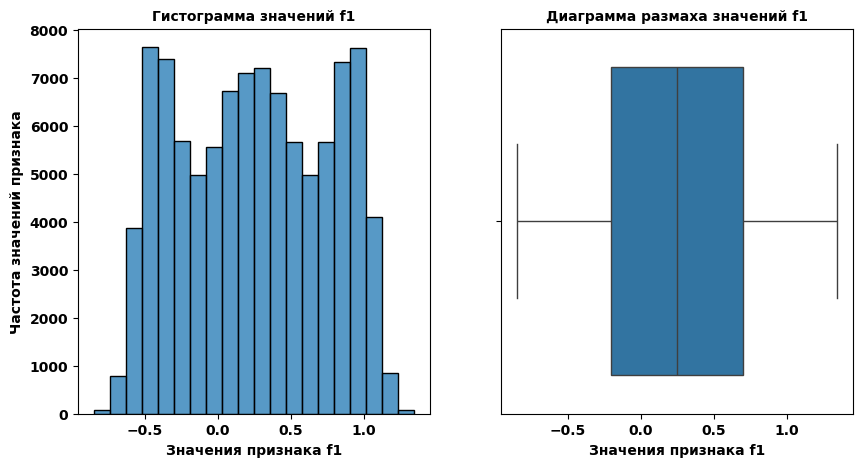

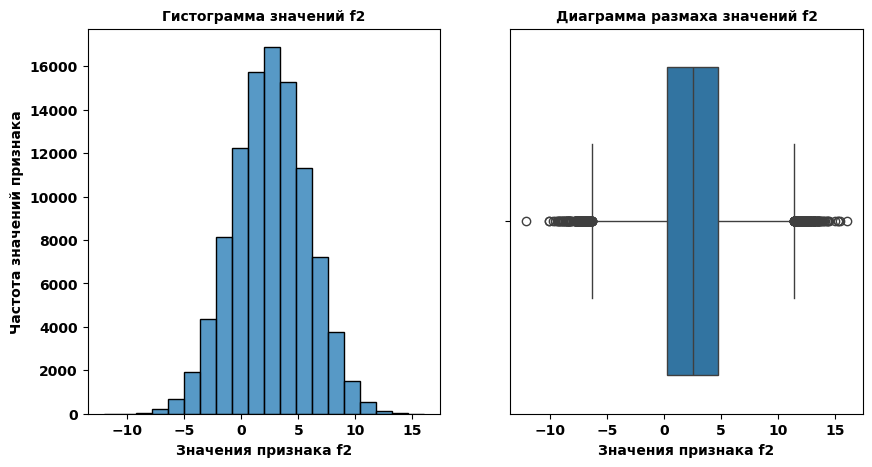

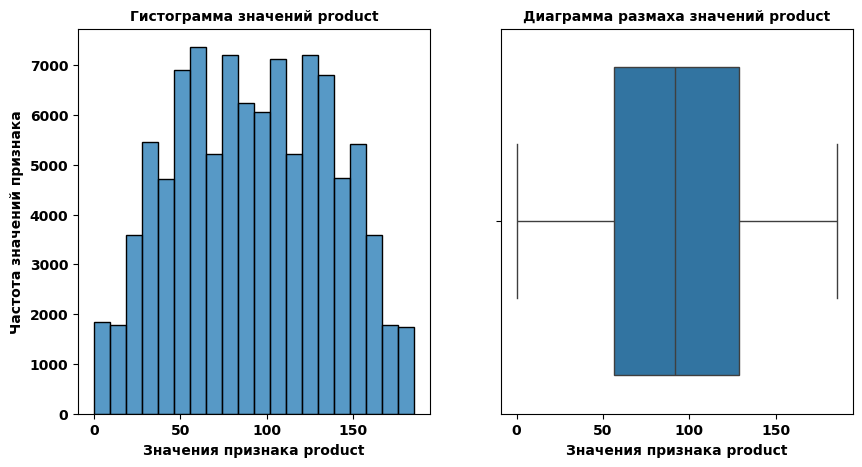

In [7]:
# вывод на экран параметров датасета 'region_1'
first_meeting(region_1, 'region_1')

# вывод на экран графиков непрерывных количественных величин по набору 'region_1'
for col in ['f0', 'f1', 'f2', 'product']:
    num_distribution(region_1, col, 20)

Структура набора данных region_2


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None



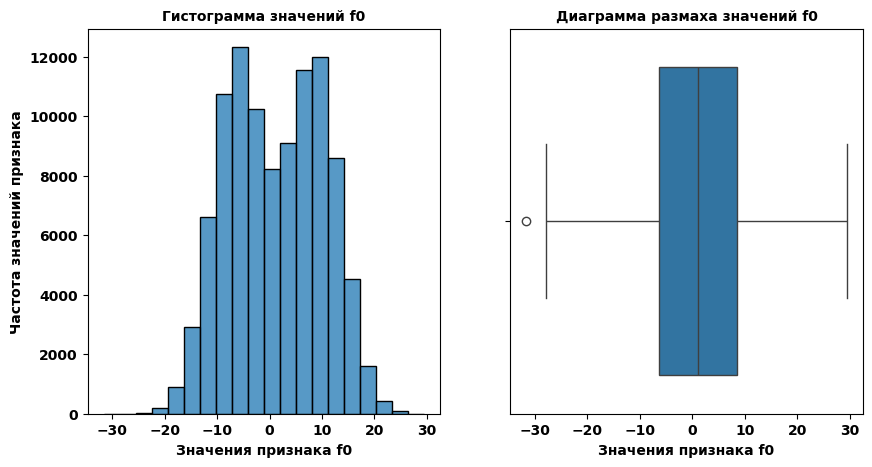

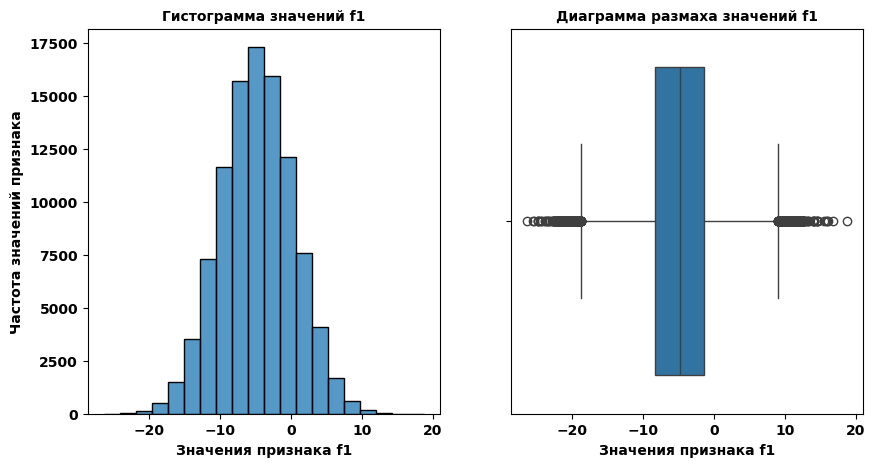

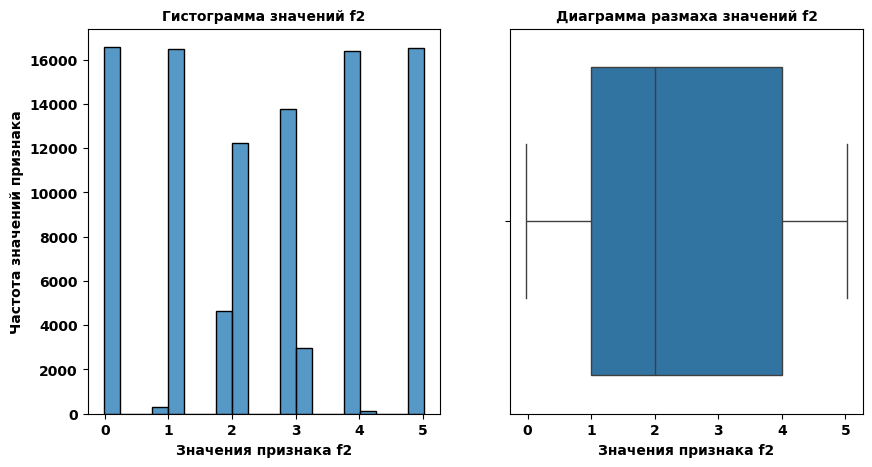

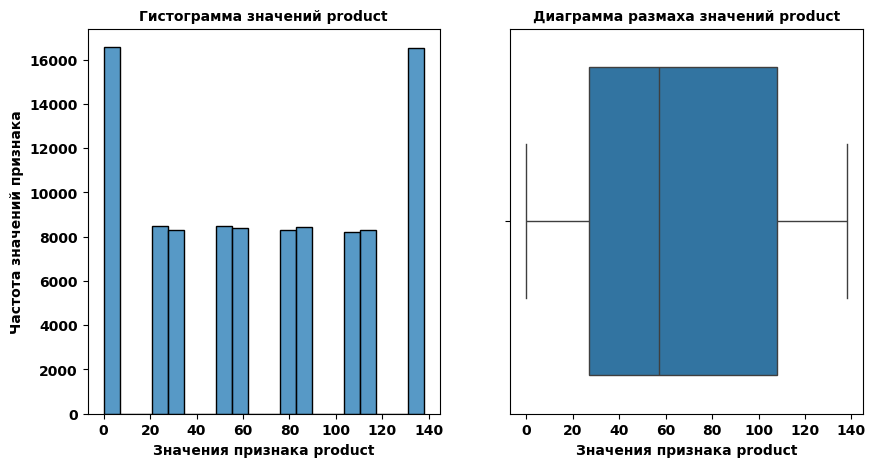

In [8]:
# вывод на экран параметров датасета 'region_2'
first_meeting(region_2, 'region_2')

# вывод на экран графиков непрерывных количественных величин по набору 'region_2'
for col in ['f0', 'f1', 'f2', 'product']:
    num_distribution(region_2, col, 20)

Структура набора данных region_3


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None



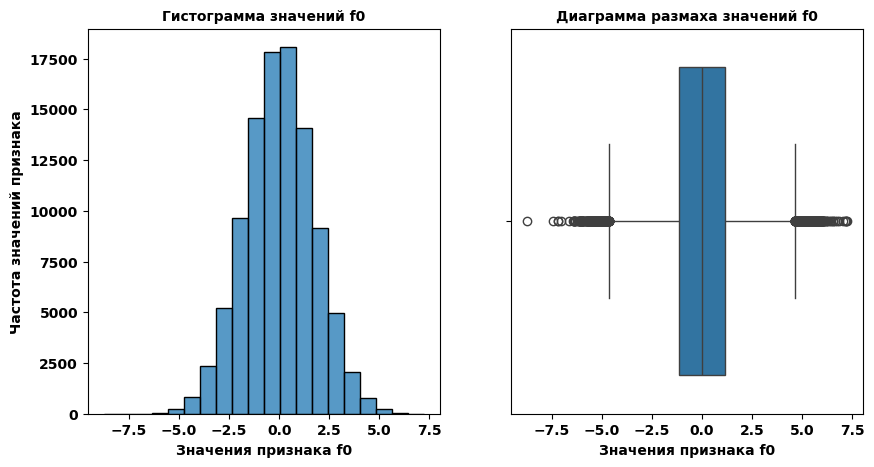

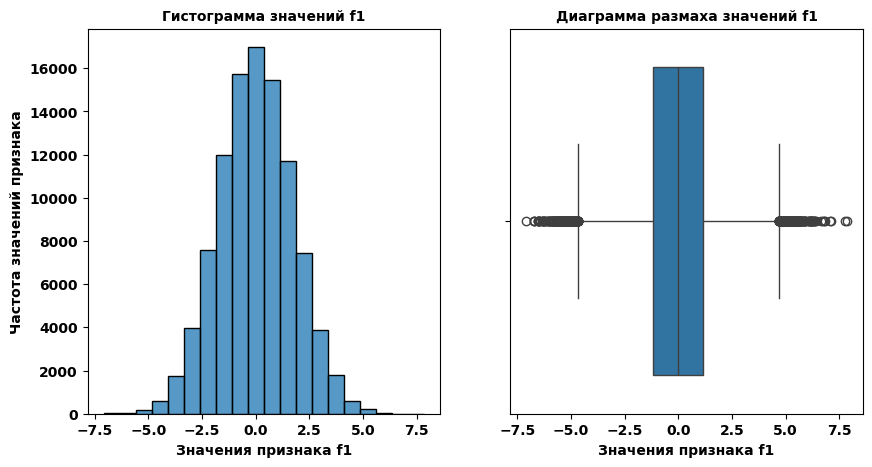

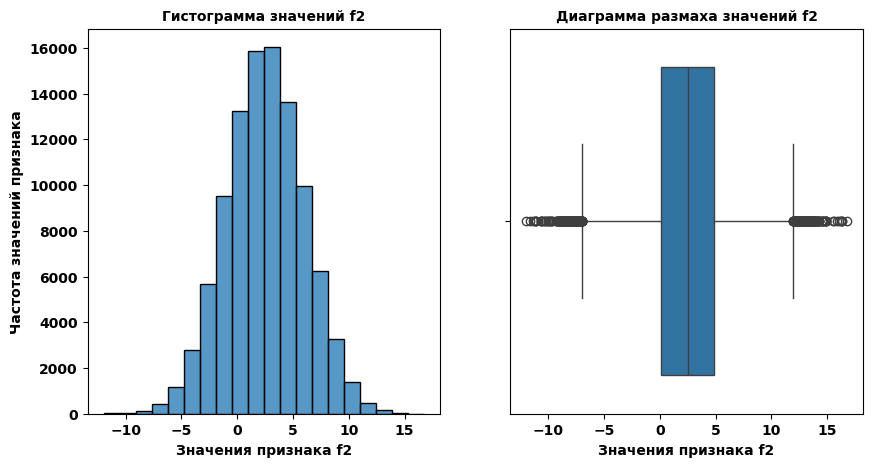

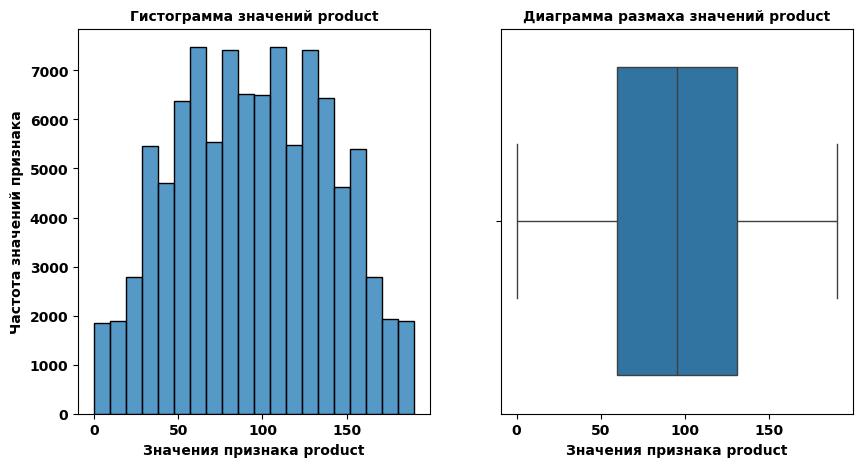

In [9]:
# вывод на экран параметров датасета 'region_3'
first_meeting(region_3, 'region_3')

# вывод на экран графиков непрерывных количественных величин по набору 'region_3'
for col in ['f0', 'f1', 'f2', 'product']:
    num_distribution(region_3, col, 20)

**Вывод**

1. Произведена загрузка данных в рабочую среду Jupyter Notebook. Инициализированы переменные в соответствие с названиями загружаемых датасетов:
    * `region_1`;
    * `region_2`;
    * `region_3`.
2. Выведены на экран параметры датасетов:
    * `region_1`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных **соответствуют сущностям значений**, приведенным в столбцах;
        * Названия столбцов **соответствуют формату snake_case**;
        * Наблюдаются **симметричные** выбросы по признаку **f2**.
    * `region_2`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных **соответствуют сущностям значений**, приведенным в столбцах;
        * Названия столбцов **соответствуют формату snake_case**;
        * Наблюдаются **симметричные** выбросы по признаку **f1**.
        * Так же наблюдается единичный выброс по признаку **f0**;
        * Заметно формирование групп по признаку **product**. Объекты образуют группы в зависимости от объемов залежей нефти.
    * `region_3`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах;
        * Названия столбцов **соответствуют формату snake_case**;
        * Наблюдаются **симметричные** выбросы по признакам **f0, f1, f2**.

## Подготовка данных для машинного обучения <a class = 'anchor' id = 'Подготовка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Разделение исходных наборов данных на область признаков и вектор целевой переменной. Инициализация переменных:
    * **features_1**, **target_1** - для региона 1;
    * **features_2**, **target_2** - для региона 2;
    * **features_3**, **target_3** - для региона 3.
2. Разделение каждых наборов данных на обучающую и тестовую выборки. Инициализация переменных:
    * **features_train_1**, **target_train_1** - для региона 1;
    * **features_train_2**, **target_train_2** - для региона 2;
    * **features_train_3**, **target_train_3** - для региона 3;
3. Проведение масштабирования количественных признаков наборов данных. Инициализация пользовательской функции **scaler**;
4. Формирование вывода по итогам данного этапа.

In [10]:
# разделение данных региона 1
features_1 = region_1.drop(['id', 'product'], axis = 1)
target_1 = region_1['product']

# разделение данных региона 2
features_2 = region_2.drop(['id', 'product'], axis = 1)
target_2 = region_2['product']

# разделение данных региона 3
features_3 = region_3.drop(['id', 'product'], axis = 1)
target_3 = region_3['product']

In [11]:
# инициализация пользовательской функции проверки разделения данных
def data_split_checkup(train_data, test_data, full_data):
    if train_data.shape[1] == test_data.shape[1]:
        print(f'Количество столбцов {train_data.shape[1]}. Потери признаков при разделении исходного набора не произошло')
    else:
        print(f'Произведено неверное разделение данных. Зафиксирована утечка признаков')
    
    if round(test_data.shape[0] / full_data.shape[0], 2) == 0.25:
        print(f'Соотношение размера тестовой выборки к исходному набору - 0.25. Соблюдено верное соотношение разделения данных')
    else:
        print(f'Произведено неверное разделение данных. Зафиксирована утечка строк')

In [12]:
# получение обучающих и тестовых данных для первого набора
features_train_1, features_test_1, target_train_1, target_test_1 = train_test_split(
    features_1, target_1, test_size = TEST_SIZE, random_state = RANDOM_STATE
)

# проверка размерности получившихся обучающих и тестовых данных
data_split_checkup(features_train_1, features_test_1, features_1)

Количество столбцов 3. Потери признаков при разделении исходного набора не произошло
Соотношение размера тестовой выборки к исходному набору - 0.25. Соблюдено верное соотношение разделения данных


In [13]:
# получение обучающих и тестовых данных для второго набора
features_train_2, features_test_2, target_train_2, target_test_2 = train_test_split(
    features_2, target_2, test_size = TEST_SIZE, random_state = RANDOM_STATE
)

# проверка размерности получившихся обучающих и тестовых данных
data_split_checkup(features_train_2, features_test_2, features_2)

Количество столбцов 3. Потери признаков при разделении исходного набора не произошло
Соотношение размера тестовой выборки к исходному набору - 0.25. Соблюдено верное соотношение разделения данных


In [14]:
# получение обучающих и тестовых данных для второго набора
features_train_3, features_test_3, target_train_3, target_test_3 = train_test_split(
    features_3, target_3, test_size = TEST_SIZE, random_state = RANDOM_STATE
)

# проверка размерности получившихся обучающих и тестовых данных
data_split_checkup(features_train_3, features_test_3, features_3)

Количество столбцов 3. Потери признаков при разделении исходного набора не произошло
Соотношение размера тестовой выборки к исходному набору - 0.25. Соблюдено верное соотношение разделения данных


In [15]:
# инициализация пользовательской функции масштабирования данных
def scaler(features_train, features_test):
    scaler = StandardScaler()
    features_train_sc = scaler.fit_transform(features_train)
    features_test_sc = scaler.transform(features_test)
    return pd.DataFrame(features_train_sc), pd.DataFrame(features_test_sc)

In [16]:
# масштабирование количественных признаков обучающих и тестовых наборов
features_train_1, features_test_1 = scaler(features_train_1, features_test_1)
features_train_2, features_test_2 = scaler(features_train_2, features_test_2)
features_train_3, features_test_3 = scaler(features_train_3, features_test_3)

**Вывод**

1. Проведено разделение исходных наборов данных на области признаков и векторы целевой переменной. Проведена инициализация переменных:
    * **features_1**, **target_1** - для региона 1;
    * **features_2**, **target_2** - для региона 2;
    * **features_3**, **target_3** - для региона 3.
2. Проведено разделение каждых наборов данных на обучающую и тестовую выборки. Проведена инициализация переменных:
    * **features_train_1**, **target_train_1** - для региона 1;
    * **features_train_2**, **target_train_2** - для региона 2;
    * **features_train_3**, **target_train_3** - для региона 3;
3. Проведено масштабирования количественных признаков наборов данных. Инициализация пользовательской функции **scaler**.

## Построение моделей линейной регрессии <a class = 'anchor' id = 'Моделирование'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Инициализация пользовательской функции для обучения модели, получения прогнозных значений и расчета функции ошибки RMSE;
2. Формирование вывода по итогам данного этапа.

In [17]:
# пользовательская функция по обучению линейной регрессии, получения прогнозных значений и расчета функции ошибки
def linear_reg (features_train, target_train, features_test, target_test):
    model = LinearRegression() # инициализация линейной регрессии
    model.fit(features_train, target_train) # обучение модели
    pred = model.predict(features_test) # получение прогнозных значений
    result = mean_squared_error(target_test, pred) ** 0.5 # получение ошибки rmse

    print('RMSE модели на тренировочной выборке: {:.2f}'.format(result))
    print('Средний спрогнозированный запас нефти: {:.2f}'.format(pred.mean()))
    print()

    return pred

In [18]:
print('Построение модели для 1-го набора:')
pred_1 = linear_reg(features_train_1, target_train_1, features_test_1, target_test_1)

print('Построение модели для 2-го набора:')
pred_2 = linear_reg(features_train_2, target_train_2, features_test_2, target_test_2)

print('Построение модели для 3-го набора:')
pred_3 = linear_reg(features_train_3, target_train_3, features_test_3, target_test_3)

Построение модели для 1-го набора:
RMSE модели на тренировочной выборке: 37.76
Средний спрогнозированный запас нефти: 92.40

Построение модели для 2-го набора:
RMSE модели на тренировочной выборке: 0.89
Средний спрогнозированный запас нефти: 68.71

Построение модели для 3-го набора:
RMSE модели на тренировочной выборке: 40.15
Средний спрогнозированный запас нефти: 94.77



**Вывод**

1. Инициализирована пользовательская функция по обучению линейной регрессии, получению прогнозных результатов и их сравнению с эталоном;
2. Получены следующие результаты:
    * Регион 1: RMSE = 37.76; Средний спрогнозированный запас нефти: 92.4;
    * Регион 2: **RMSE = 0.89**; Средний спрогнозированный запас нефти: 68.71;
    * Регион 3: RMSE = 40.15; **Средний спрогнозированный запас нефти: 94.77**;
    * **Наиболее точная модель построена для региона 2**, так как RMSE минимальна - 0.89;
    * **Наибольший средний спрогнозированный запас нефти наблюдается в регионе 3** - 94.77.

## Оценка достаточности объема сырья для безубыточной разработки <a class = 'anchor' id = 'Безубыток'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Инициализация переменных для хранения средних спрогнозированных значений запасов нефти в 3-ех регионах: **mean_1**, **mean_2**, **mean_3**;
2. Проведение расчета значений безубыточности разработки месторождения:
    * Инициализация переменных, исходя из условия задачи: **BUDGET**, **WELLS**, **INCOME_PER_BUDGET**;
    * Расчет бюджета на разработку скважины - инициализация переменной **budget_per_well**;
    * Расчет объема сырья для безубыточной разработки скважины - инициализация переменной **min_volume**;
3. Расчет прибыли от спрогнозированных объемов сырья в трех регионах;
4. Расчет рисков и прибыли для каждого региона;
5. Формирование вывода по итогам данного этапа.

In [19]:
# средние спрогнозированные запасы нефти в 3-ех регионах
mean_1 = 92.40
mean_2 = 68.71
mean_3 = 94.77

In [20]:
# инициализация переменных исходя из условия задачи
BUDGET = 10 ** 10 # бюджет на разработку скважин в регионе
WELLS = 200 # количество скважин для разработки
INCOME_PER_BARREL = 450_000 # доход с каждой тысячи баррелей сырья

# расчет бюджета на одну скважину
budget_per_well = BUDGET / WELLS

# расчет достаточного объема сырья для безубыточной разработки новой скважины
min_volume = budget_per_well / INCOME_PER_BARREL

print('Бюджет на одну скважину: {:.2f}'.format(budget_per_well))
print('Минимальный объем сырья для безубыточной разработки новой скважины: {:.2f}'.format(min_volume))

Бюджет на одну скважину: 50000000.00
Минимальный объем сырья для безубыточной разработки новой скважины: 111.11


In [21]:
# сравнение средних спрогнозированных объемов сырья с минимальным объемом
print(f'Средний спрогнозированный объем сырья в регионе 1 меньше минимального объема в {min_volume / mean_1:.2f} раза')
print(f'Средний спрогнозированный объем сырья в регионе 2 меньше минимального объема в {min_volume / mean_2:.2f} раза')
print(f'Средний спрогнозированный объем сырья в регионе 3 меньше минимального объема в {min_volume / mean_3:.2f} раза')

Средний спрогнозированный объем сырья в регионе 1 меньше минимального объема в 1.20 раза
Средний спрогнозированный объем сырья в регионе 2 меньше минимального объема в 1.62 раза
Средний спрогнозированный объем сырья в регионе 3 меньше минимального объема в 1.17 раза


**Вывод по промежуточному этапу**

Бюджет на разработку одной скважины составляет **50 млн. руб**.

Минимальный объем сырья для безубыточной разработки новой скважины: **111.11 тыс. баррелей**.

Исходя из полученных данных, **ни один из регионов не обладает достаточным средним объемом сырья для безубыточной разработки**.

Однако, необходимо учитывать, что средний объем сырья - это лишь один из факторов, влияющих на прибыльность разработки. Необходимо оценить риски и прибыль для каждого региона на основании техники Bootstrap с 1 000 выборок.

In [22]:
# инициализация пользовательской функции по расчету прибыли от 200 лучших скважин
def profit(predictions_valid):  
    predict_valid_max =pd.Series(predictions_valid).sort_values(ascending=False).head(WELLS)
    profit = (predict_valid_max.sum()*INCOME_PER_BARREL - BUDGET)/10**9 
    return profit

In [23]:
print(f"Прибыль для спрогнозированного кол-ва сырья в регионе 1: {'%.3f'%profit(pred_1)} млрд.руб.")
print(f"Прибыль для спрогнозированного кол-ва сырья в регионе 2: {'%.3f'%profit(pred_2)} млрд.руб.")
print(f"Прибыль для спрогнозированного кол-ва сырья в регионе 3: {'%.3f'%profit(pred_3)} млрд.руб.")

Прибыль для спрогнозированного кол-ва сырья в регионе 1: 3.897 млрд.руб.
Прибыль для спрогнозированного кол-ва сырья в регионе 2: 2.487 млрд.руб.
Прибыль для спрогнозированного кол-ва сырья в регионе 3: 3.378 млрд.руб.


In [24]:
# инициализация пользовательской функции расчета прибыли, риска и доверительного интервала
def risk_profit (target_test, pred):
    values = []
    target_test = target_test.reset_index(drop=True)
    state = np.random.RandomState(RANDOM_STATE)
    for i in range(1000):
        target_subsample = target_test.sample(n=500, replace=True, random_state=state)
        probs_subsample = pred[target_subsample.index]
        values.append(profit(probs_subsample))
    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risk = (values < 0).mean() * 100
    print("Средняя прибыль: {:.3f} млрд.руб.".format(mean))
    print("Риск убытков: {:.2f}%".format(risk))
    print("95% доверительный интервал: [{:.3f}, {:.3f}] млрд.руб.".format(lower, upper))
    print()

In [25]:
# оценка рисков для 1-го региона
risk_profit(target_test_1, pred_1)

Средняя прибыль: 0.331 млрд.руб.
Риск убытков: 0.30%
95% доверительный интервал: [0.105, 0.555] млрд.руб.



In [26]:
# оценка рисков для 2-го региона
risk_profit(target_test_2, pred_2)

Средняя прибыль: 0.450 млрд.руб.
Риск убытков: 1.60%
95% доверительный интервал: [0.064, 0.853] млрд.руб.



In [27]:
# оценка рисков для 3-го региона
risk_profit(target_test_3, pred_3)

Средняя прибыль: 0.269 млрд.руб.
Риск убытков: 0.30%
95% доверительный интервал: [0.077, 0.478] млрд.руб.



**Вывод**

1. Инициализированы переменные для хранения средних спрогнозированных значений запасов нефти в 3-ех регионах: **mean_1**, **mean_2**, **mean_3**;
2. Проведен расчет значений безубыточности разработки месторождения:
    * Бюджет на разработку одной скважины - **50 млн. руб.**;
    * Минимальный объем сырья для безубыточной разработки новой скважины - **111.11 тыс. баррелей**;
    * Средний спрогнозированный объем сырья:
        * в регионе 1 меньше минимального объема в **1.20 раза**;
        * в регионе 2 меньше минимального объема в **1.62 раза**;
        * в регионе 3 меньше минимального объема в **1.17 раза**.
3. Проведен расчет прибыли от спрогнозированных объемов сырья в трех регионах:
    * в регионе 1: **3.897 млрд.руб**;
    * в регионе 2: **2.487 млрд.руб**;
    * в регионе 3: **3.378 млрд.руб**.
4. Проведен расчет рисков и прибыли для каждого региона:
    * Регион 1:
        * Средняя прибыль: **0.331 млрд.руб.**
        * Риск убытков: **0.3%**
        * 95% доверительный интервал: [**0.105, 0.555**] млрд.руб.
    * Регион 2:
        * Средняя прибыль: **0.450 млрд.руб.**
        * Риск убытков: **1.6%**
        * 95% доверительный интервал: [**0.064, 0.853**] млрд.руб.
    * Регион 3:
        * Средняя прибыль: **0.269 млрд.руб.**
        * Риск убытков: **0.3%**
        * 95% доверительный интервал: [**0.077, 0.478**] млрд.руб.




Исходя из полученных данных, **регион 2 является наиболее подходящим для проведения разработки**, учитывая все условия задачи:
* **вероятность убытка составляет 1.6%**;
* **средняя прибыль составляет 0.450 млрд.руб.**;
* **доверительный интервал: 0.064 - 0.853 млрд. руб**.

## Общий вывод <a class = 'anchor' id = 'Вывод'></a>

1. Импортированы библиотеки Python:
    * для манипулирования данными:
        * pandas;
        * numpy.
    * для визуализации данных:
        * matplotlib.pyplot;
        * seaborn.
    * для решения задач машинного обучения:
        * LinearRegression - модель линейной регрессии;
        * mean_squared_error - среднеквадратичная ошибка;
        * train_test_split - механизм разделения данных;
        * StandardScaler - стандартизация данных;
2. Инициализированы переменные:
    * **RANDOM_STATE** для фиксирования "случайности";
    * **TEST_SIZE** для фиксирования размера тестовой выборки.
3. Произведена загрузка данных в рабочую среду Jupyter Notebook. Инициализированы переменные в соответствие с названиями загружаемых датасетов:
    * `region_1`;
    * `region_2`;
    * `region_3`.
4. Выведены на экран параметры датасетов:
    * `region_1`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных **соответствуют сущностям значений**, приведенным в столбцах;
        * Названия столбцов **соответствуют формату snake_case**;
        * Наблюдаются **симметричные** выбросы по признаку **f2**.
    * `region_2`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных **соответствуют сущностям значений**, приведенным в столбцах;
        * Названия столбцов **соответствуют формату snake_case**;
        * Наблюдаются **симметричные** выбросы по признаку **f1**.
        * Так же наблюдается единичный выброс по признаку **f0**;
        * Заметно формирование групп по признаку **product**. Объекты образуют группы в зависимости от объемов залежей нефти.
    * `region_3`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах;
        * Названия столбцов **соответствуют формату snake_case**;
        * Наблюдаются **симметричные** выбросы по признакам **f0, f1, f2**.
5. Проведено разделение исходных наборов данных на области признаков и векторы целевой переменной. Проведена инициализация переменных:
    * **features_1**, **target_1** - для региона 1;
    * **features_2**, **target_2** - для региона 2;
    * **features_3**, **target_3** - для региона 3.
6. Проведено разделение каждых наборов данных на обучающую и тестовую выборки. Проведена инициализация переменных:
    * **features_train_1**, **target_train_1** - для региона 1;
    * **features_train_2**, **target_train_2** - для региона 2;
    * **features_train_3**, **target_train_3** - для региона 3;
7. Проведено масштабирования количественных признаков наборов данных. Инициализация пользовательской функции **scaler**.
8. Инициализирована пользовательская функция по обучению линейной регрессии, получению прогнозных результатов и их сравнению с эталоном;
9. Получены следующие результаты:
    * Регион 1: RMSE = 37.76; Средний спрогнозированный запас нефти: 92.4;
    * Регион 2: **RMSE = 0.89**; Средний спрогнозированный запас нефти: 68.71;
    * Регион 3: RMSE = 40.15; **Средний спрогнозированный запас нефти: 94.77**;
    * **Наиболее точная модель построена для региона 2**, так как RMSE минимальна - 0.89;
    * **Наибольший средний спрогнозированный запас нефти наблюдается в регионе 3** - 94.77.
10. Инициализированы переменные для хранения средних спрогнозированных значений запасов нефти в 3-ех регионах: **mean_1**, **mean_2**, **mean_3**;
11. Проведен расчет значений безубыточности разработки месторождения:
    * Бюджет на разработку одной скважины - **50 млн. руб.**;
    * Минимальный объем сырья для безубыточной разработки новой скважины - **111.11 тыс. баррелей**;
    * Средний спрогнозированный объем сырья:
        * в регионе 1 меньше минимального объема в **1.20 раза**;
        * в регионе 2 меньше минимального объема в **1.62 раза**;
        * в регионе 3 меньше минимального объема в **1.17 раза**.
12. Проведен расчет прибыли от спрогнозированных объемов сырья в трех регионах:
    * в регионе 1: **3.897 млрд.руб**;
    * в регионе 2: **2.487 млрд.руб**;
    * в регионе 3: **3.378 млрд.руб**.
13. Проведен расчет рисков и прибыли для каждого региона:
    * Регион 1:
        * Средняя прибыль: **0.331 млрд.руб.**
        * Риск убытков: **0.3%**
        * 95% доверительный интервал: [**0.105, 0.555**] млрд.руб.
    * Регион 2:
        * Средняя прибыль: **0.450 млрд.руб.**
        * Риск убытков: **1.6%**
        * 95% доверительный интервал: [**0.064, 0.853**] млрд.руб.
    * Регион 3:
        * Средняя прибыль: **0.269 млрд.руб.**
        * Риск убытков: **0.3%**
        * 95% доверительный интервал: [**0.077, 0.478**] млрд.руб.



Исходя из полученных данных, **регион 2 является наиболее подходящим для проведения разработки**, учитывая все условия задачи:
* **вероятность убытка составляет 1.6%**;
* **средняя прибыль составляет 0.450 млрд.руб.**;
* **доверительный интервал: 0.064 - 0.853 млрд. руб**.